# Prática 1

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**



## Visualização e exploração de dados

### Associação entre variáveis

Considere os dados de 100 mil clientes de um banco no arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.


Analise as possíveis associações entre o sexo, idade, empresa, salário, saldo em conta corrente, saldo em conta poupança, saldo em investimento e devedor no cartão com a variável Inadimplente.

Sexo: qualitativa nominal   
Idade: quantitativa contínua   
Empresa: qualitativa nominal   
Salário: quantitativa contínua   
Saldo_cc: quantitativa contínua   
Saldo_poupança: quantitativa contínua   
Saldo_investimento: quantitativa contínua   
Devedor_cartão: quantitativa contínua   
Inadimplente: qualitativa nominal (embora numérica) 

In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

# pkgdir = '/home/cibele/CibelePython/ECD/Data'

# Dados banco - Leitura dos dados
# dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0, decimal=',')
dados = pd.read_csv('dados_banco.csv', index_col=0, decimal=',')

dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
1,1,M,33,Privada,6019,1084.98,0.0,0.0,1214.35,0
2,2,F,31,Pública,5134,532.09,0.0,0.0,1662.96,0
3,3,M,31,Pública,5286,719.91,0.0,0.0,2167.97,0
4,4,F,32,Privada,5534,547.47,0.0,0.0,639.13,1
5,5,F,28,Autônomo,4559,412.81,0.0,0.0,1466.96,1


#### Descreva a associação entre sexo e inadimplência.


##### Associação entre 'Inadimplente' e 'Sexo': qualitativa nominal vs qualitativa nominal
Não parece haver associação.

In [5]:
# Tabela de dupla entrada
tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Sexo'])
tabela_dupla

Sexo,F,M
Inadimplente,,
0,31603,44038
1,10242,14117


In [6]:
# Tabela de dupla entrada
tab = pd.crosstab(index=dados['Inadimplente'], columns=dados['Sexo'])

# Tabela de frequências relativas
tab/tab.sum()


Sexo,F,M
Inadimplente,,
0,0.75524,0.757252
1,0.24476,0.242748


#### Há associação entre idade e inadimplência?

##### Associação entre 'Inadimplente' e 'Idade': qualitativa nominal vs quantitativa contínua   
Não parece haver associação.

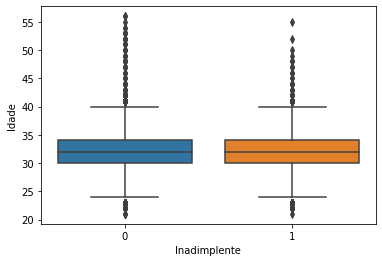

In [7]:
ax = sns.boxplot(x='Inadimplente', y='Idade', data=dados)

In [16]:
# Não funciona
# ax = sns.catplot(x='Inadimplente', y='Idade', hue='Sexo', kind='violin', split=True, data=dados)
# ax = sns.catplot(x='Inadimplente', y='Idade', kind='violin', data=dados)

#### Há associação entre empresa e inadimplência?

##### Associação entre 'Inadimplente' e 'Empresa': qualitativa nominal vs qualitativa nominal
Indica uma associação: Autônomo (principalmente) e Privada têm uma tendência de maior correlação com Inadimplente.

In [8]:
# Tabela de dupla entrada
tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Empresa'])
tabela_dupla

Empresa,Autônomo,Privada,Pública
Inadimplente,,,
0,8345,46144,21152
1,5861,15480,3018


In [9]:
# Tabela de frequências relativas
tabela_dupla/tabela_dupla.sum()

Empresa,Autônomo,Privada,Pública
Inadimplente,,,
0,0.587428,0.748799,0.875134
1,0.412572,0.251201,0.124866


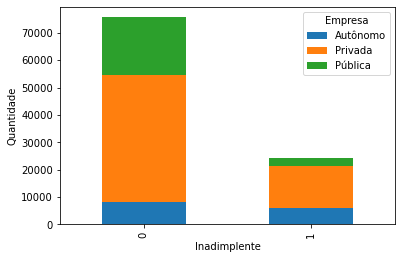

In [10]:
tabela_dupla.plot.bar(stacked=True)
plt.legend(title='Empresa')
plt.ylabel("Quantidade")
plt.show()

#### Verifique a associação entre salário e inadimplência.

##### Associação entre 'Inadimplente' e 'Salário': qualitativa nominal vs quantitativa contínua
Não indica uma associação.

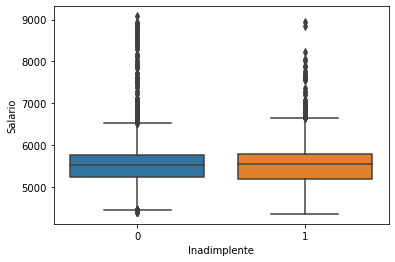

In [11]:
ax = sns.boxplot(x='Inadimplente', y='Salario', data=dados)

#### Verifique a associação entre saldo em conta corrente e inadimplência.

##### Associação entre 'Inadimplente' e 'Saldo_cc': qualitativa nominal vs quantitativa contínua
Não indica uma associação.

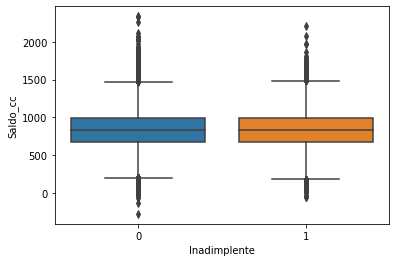

In [12]:
ax = sns.boxplot(x='Inadimplente', y='Saldo_cc', data=dados)

#### Há associação entre saldo em conta poupança e inadimplência?

##### Associação entre 'Inadimplente' e 'Saldo_poupança': qualitativa nominal vs quantitativa contínua
Indica uma associação: quem tem saldo em poupança não é inadimplente.

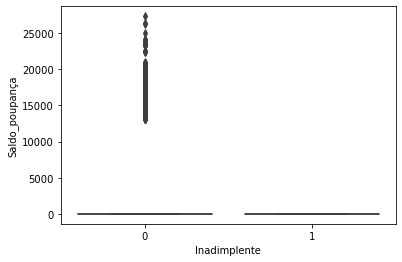

In [13]:
ax = sns.boxplot(x='Inadimplente', y='Saldo_poupança', data=dados)

#### Há associação entre saldo em investimentos e inadimplência?

##### Associação entre 'Inadimplente' e 'Saldo_investimento': qualitativa nominal vs quantitativa contínua
Indica uma associação: quem tem saldo em investimentos não é inadimplente.

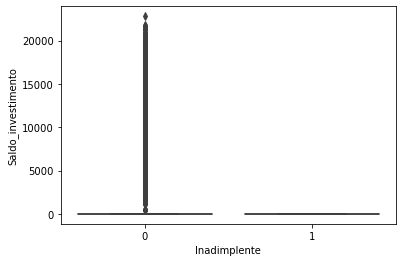

In [14]:
ax = sns.boxplot(x='Inadimplente', y='Saldo_investimento', data=dados)

#### Há associação entre devedor no cartão e inadimplência?

##### Associação entre 'Inadimplente' e 'Devedor_cartao': qualitativa nominal vs quantitativa contínua
Indica uma possível pequena associação: quanto mais Devedor_cartao maior a chance de ser Inadimplente

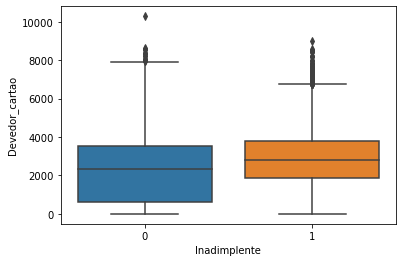

In [15]:
ax = sns.boxplot(x='Inadimplente', y='Devedor_cartao', data=dados)

Como não fizemos análises inferenciais, não podemos concluir estatisticamente sobre as associações. Porém, com base nas análises de visualização e exploração de dados, parece existir associação entre inadimplência e tipo de empresa somente.